# <font color = lightcoral>Step 2: Visualizations - Basic

## <font color = grey> Admin

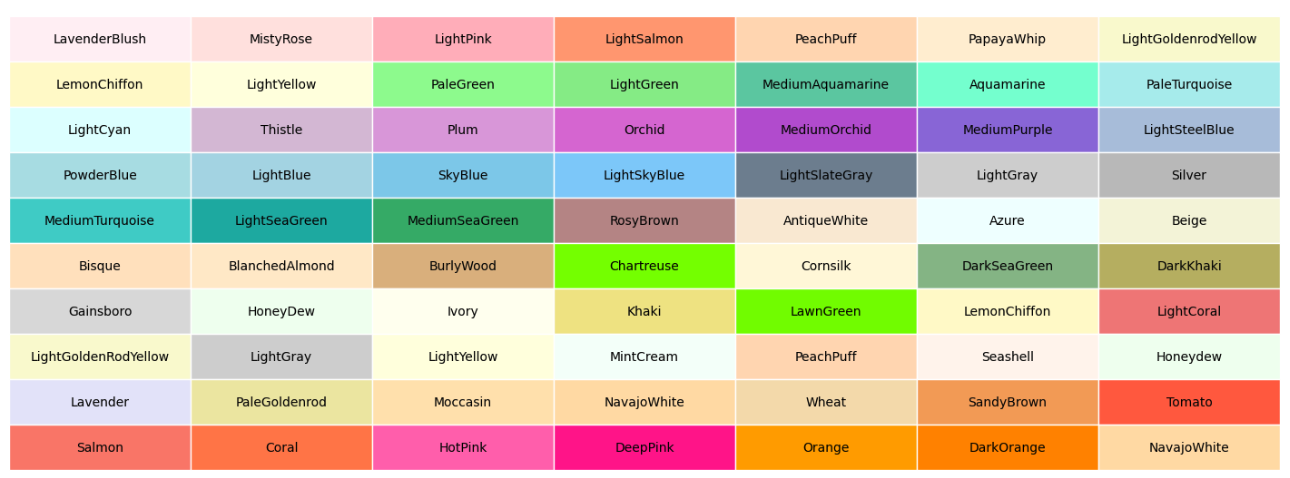

In [2]:
import pandas as pd
import os
import gzip
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /root


___
# <font color = darkkhaki> Prepare working dataframe

In [4]:
import os
import gzip
import pandas as pd
import time

# Start timing
start_time = time.time()

# Define the file path
file_path = os.path.join(base_dir, '11.Data/01.BGL/01.Raw_CFDR/bgl2.gz')

# Function to process each chunk and extract relevant statistics
def process_chunk_full(chunk):
    # Split the lines into columns based on the structure of the data
    data = [line.split(' ', maxsplit=9) for line in chunk]

    # Add a new column for the alert status
    alert_status = ['Alert' if parts[0] != '-' else 'Normal' for parts in data]

    # Remove the first element (alert status) from each row in the data
    data = [parts[1:] for parts in data]

    # Define column names based on the observed structure
    columns = ['ID', 'Date', 'Seq_ID_1', 'Timestamp', 'Seq_ID_2', 'Category', 'Component', 'Message_Type', 'Message_Body']

    # Create a DataFrame
    df = pd.DataFrame(data, columns=columns)
    
    # Add the alert status column
    df.insert(0, 'AlertStatus', alert_status)

    return df

# Read the file in chunks and concatenate into a single DataFrame
chunk_size = 100000  # Adjust the chunk size as needed
df_list = []

with gzip.open(file_path, 'rt') as f:
    while True:
        chunk = []
        for _ in range(chunk_size):
            try:
                chunk.append(next(f).strip())
            except StopIteration:
                break
        if not chunk:
            break
        df_chunk = process_chunk_full(chunk)
        df_list.append(df_chunk)

# Concatenate all chunks into a single DataFrame
df_full = pd.concat(df_list, ignore_index=True)

# Display the DataFrame
# print(df_full)

# To verify, you can display summary statistics or perform any analysis as needed
print("Total records in the DataFrame:", len(df_full))

# Display the first 10 rows of the DataFrame
display(df_full.head(10))

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")
# df_full.head(10)

Total records in the DataFrame: 4747963


,AlertStatus,ID,Date,Seq_ID_1,Timestamp,Seq_ID_2,Category,Component,Message_Type,Message_Body
0,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
1,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
2,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
3,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
4,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
5,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.131467,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
6,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.293532,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
7,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.428563,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
8,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.601412,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
9,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.749199,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected



Time taken: 26.47 seconds


___
# <font color = darkkhaki> Visuals - Basic

### <font color = peachpuff> Alert vs Normal messages

Alert Status Counts:


,AlertStatus,Count
0,Normal,4399265
1,Alert,348698


/tmp/ipykernel_20/1885225722.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=alert_status_counts_df, x='AlertStatus', y='Count', palette=palette)
/tmp/ipykernel_20/1885225722.py:23: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(data=alert_status_counts_df, x='AlertStatus', y='Count', palette=palette)


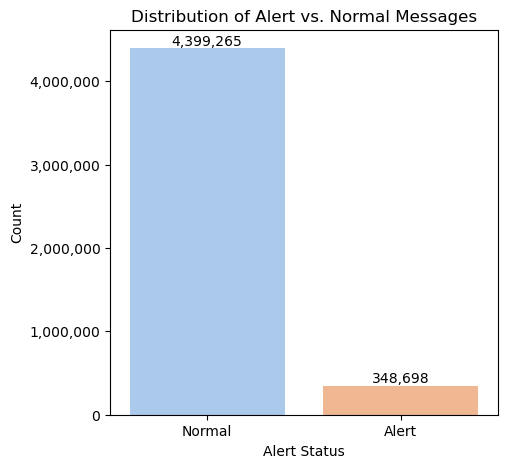


Time taken: 0.39 seconds


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Start timing
start_time = time.time()

# Calculate alert status counts directly from the df_full DataFrame
alert_status_counts_df = df_full['AlertStatus'].value_counts().reset_index()
alert_status_counts_df.columns = ['AlertStatus', 'Count']
alert_status_counts_df = alert_status_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the DataFrame
print("Alert Status Counts:")
display(alert_status_counts_df)

# Define the pastel color palette
palette = sns.color_palette("pastel")

# Visualization: Distribution of Alert vs. Normal Messages
plt.figure(figsize=(5, 5))
ax = sns.barplot(data=alert_status_counts_df, x='AlertStatus', y='Count', palette=palette)
plt.title('Distribution of Alert vs. Normal Messages')
plt.xlabel('Alert Status')
plt.ylabel('Count')

# Format the y-axis numbers with commas
def y_format(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_format))

# Annotate bars with counts in comma-separated format
for container in ax.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")


___
### <font color = peachpuff> Distribution of Categories

Category Counts:


,Category,Count
0,RAS,4643432
1,NULL,104215
2,KERNEL,306
3,for,4
4,"interrupts,",4
5,(5438708),1
6,(4211594),1


/tmp/ipykernel_20/711495869.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=category_counts_df, y='Category', x='Count', palette=palette)
/tmp/ipykernel_20/711495869.py:23: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  ax = sns.barplot(data=category_counts_df, y='Category', x='Count', palette=palette)


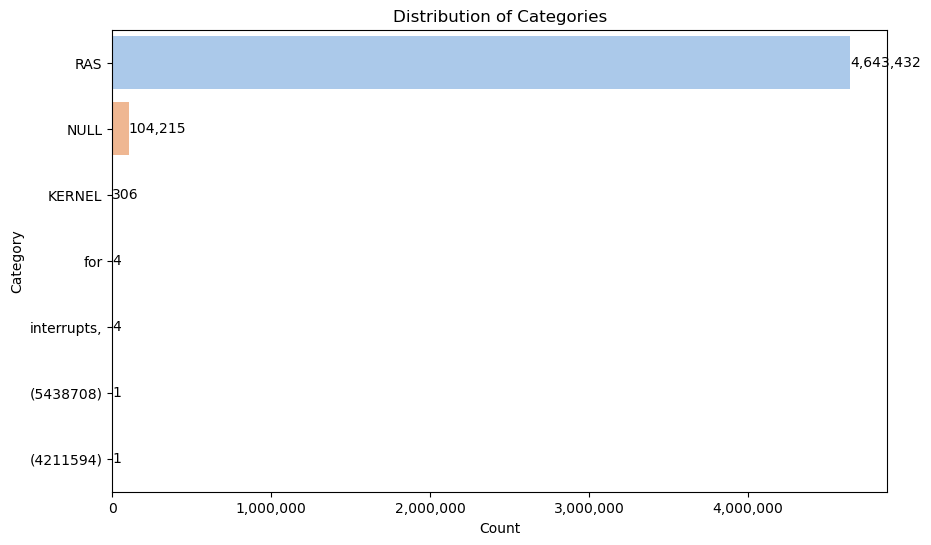


Time taken: 0.78 seconds


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Start timing
start_time = time.time()

# Calculate category counts directly from the df_full DataFrame
category_counts_df = df_full['Category'].value_counts().reset_index()
category_counts_df.columns = ['Category', 'Count']
category_counts_df = category_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the DataFrame
print("Category Counts:")
display(category_counts_df)

# Define the pastel color palette
palette = sns.color_palette("pastel")

# Visualization: Distribution of Categories
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=category_counts_df, y='Category', x='Count', palette=palette)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')

# Annotate bars with counts in comma-separated format
for container in ax.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Format the x-axis numbers with commas
ax.xaxis.set_major_formatter(FuncFormatter(y_format))
plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")


___
### <font color = peachpuff> Distribution of Components

Component Counts:


,Component,Count
0,KERNEL,4324651
1,APP,228536
2,DISCOVERY,97172
3,MMCS,88930
4,HARDWARE,5148
5,MONITOR,1681
6,LINKCARD,1170
7,FATAL,306
8,CMCS,211
9,BGLMASTER,145


/tmp/ipykernel_20/4040000401.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=component_counts_df, y='Component', x='Count', palette=palette)
/tmp/ipykernel_20/4040000401.py:15: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=component_counts_df, y='Component', x='Count', palette=palette)


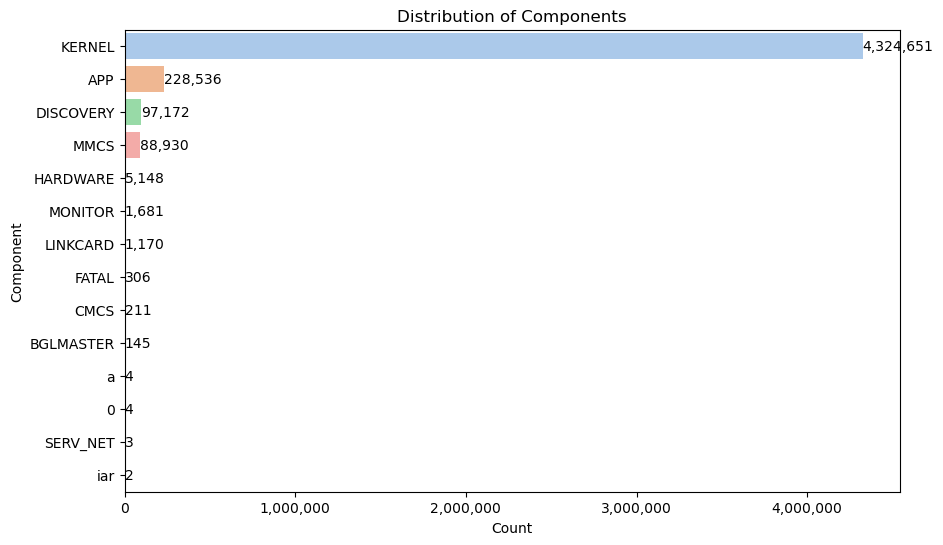


Time taken: 0.90 seconds


In [7]:
# Start timing
start_time = time.time()

# Calculate component counts directly from the df_full DataFrame
component_counts_df = df_full['Component'].value_counts().reset_index()
component_counts_df.columns = ['Component', 'Count']
component_counts_df = component_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the DataFrame
print("Component Counts:")
display(component_counts_df)

# Visualization: Distribution of Components
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=component_counts_df, y='Component', x='Count', palette=palette)
plt.title('Distribution of Components')
plt.xlabel('Count')
plt.ylabel('Component')

# Annotate bars with counts in comma-separated format
for container in ax.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Format the x-axis numbers with commas
ax.xaxis.set_major_formatter(FuncFormatter(y_format))
plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")


___
### <font color = peachpuff> Distribution of Message Types

Message_Type Counts:


,Message_Type,Count
0,INFO,3735813
1,FATAL,855195
2,ERROR,112355
3,WARNING,23357
4,SEVERE,19213
5,FAILURE,1714
6,Kill,306
7,single,4
8,microseconds,4
9,"0x00544eb8,",2


/tmp/ipykernel_20/3833386804.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=message_type_counts_df, y='Message_Type', x='Count', palette=palette)


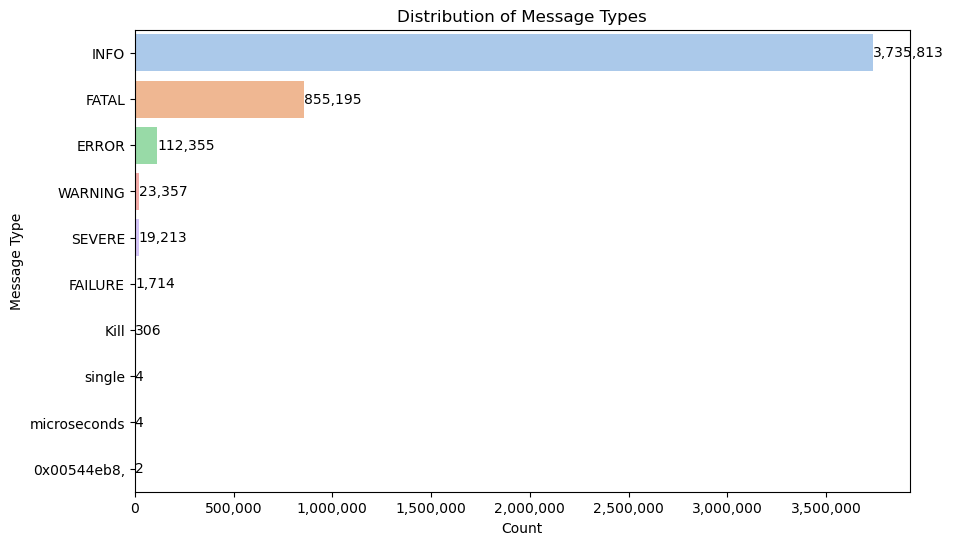


Time taken: 0.85 seconds


In [8]:
# Start timing
start_time = time.time()

# Calculate message type counts directly from the df_full DataFrame
message_type_counts_df = df_full['Message_Type'].value_counts().reset_index()
message_type_counts_df.columns = ['Message_Type', 'Count']
message_type_counts_df = message_type_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the DataFrame
print("Message_Type Counts:")
display(message_type_counts_df)

# Visualization: Distribution of Message Types
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=message_type_counts_df, y='Message_Type', x='Count', palette=palette)
plt.title('Distribution of Message Types')
plt.xlabel('Count')
plt.ylabel('Message Type')

# Annotate bars with counts in comma-separated format
for container in ax.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Format the x-axis numbers with commas
ax.xaxis.set_major_formatter(FuncFormatter(y_format))
plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")


___
### <font color = peachpuff> Distribution of Message Body

,Message_Body,Count
0,data TLB error interrupt,152734
1,0 microseconds spent in the rbs signal handler during 0 calls. 0 microseconds was the maximum time for a single instance of a correctable ddr.,135005
2,instruction cache parity error corrected,105924
3,"idoproxydb hit ASSERT condition: ASSERT expression=0 Source file=idotransportmgr.cpp Source line=1043 Function=int IdoTransportMgr::SendPacket(IdoUdpMgr*, BglCtlPavTrace*)",84168
4,1146800 double-hummer alignment exceptions,74091
5,8 floating point alignment exceptions,65558
6,data storage interrupt,63493
7,5 floating point alignment exceptions,53099
8,instruction address: 0x00004ed8,47104
9,15 floating point alignment exceptions,32769


/tmp/ipykernel_20/2970945736.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_message_body_counts_df['Truncated_Message_Body'] = top_10_message_body_counts_df['Message_Body'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)
/tmp/ipykernel_20/2970945736.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_message_body_counts_df, y='Truncated_Message_Body', x='Count', palette=palette)


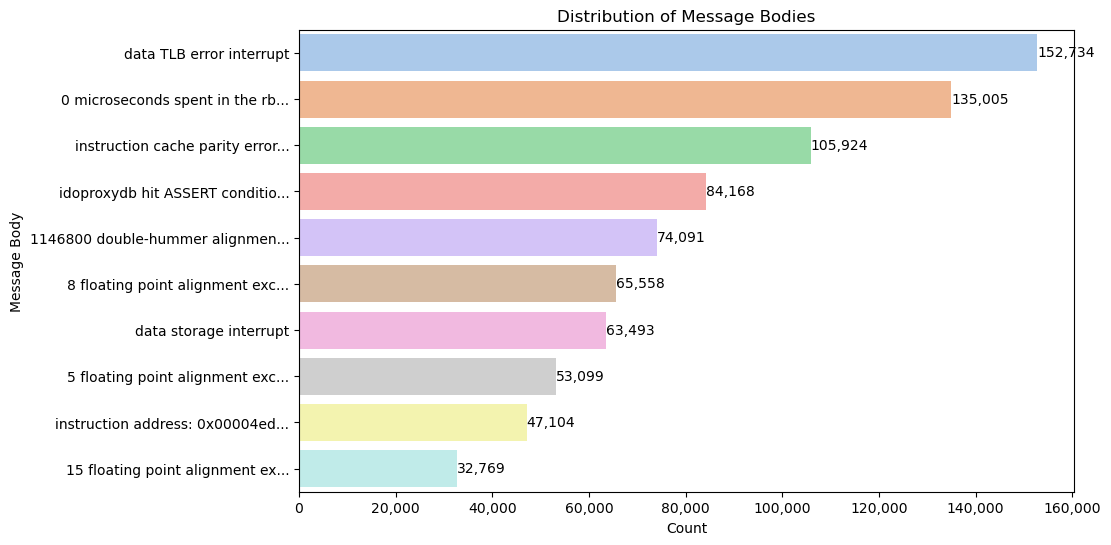


Time taken: 1.49 seconds


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format y-axis with commas
def y_format(value, tick_number):
    return f'{int(value):,}'

# Start timing
start_time = time.time()

# Calculate message body counts directly from the df_full DataFrame
message_body_counts_df = df_full['Message_Body'].value_counts().reset_index()
message_body_counts_df.columns = ['Message_Body', 'Count']
message_body_counts_df = message_body_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Subset the DataFrame to top 10 rows
top_10_message_body_counts_df = message_body_counts_df.head(10)

# Display the DataFrame with left-justified text for the 'Message_Body' column
styled_df = top_10_message_body_counts_df.style.set_properties(subset=['Message_Body'], **{'text-align': 'left'})
display(styled_df)

# Define the pastel color palette
palette = sns.color_palette("pastel")

# Visualization: Distribution of Message Bodies
plt.figure(figsize=(10, 6))
top_10_message_body_counts_df['Truncated_Message_Body'] = top_10_message_body_counts_df['Message_Body'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)
ax = sns.barplot(data=top_10_message_body_counts_df, y='Truncated_Message_Body', x='Count', palette=palette)
plt.title('Distribution of Message Bodies')
plt.xlabel('Count')
plt.ylabel('Message Body')

# Annotate bars with counts in comma-separated format
for container in ax.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Format the x-axis numbers with commas
ax.xaxis.set_major_formatter(FuncFormatter(y_format))
plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")
